Starting the GUI application...


C:\Users\marat\anaconda3\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.2.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\marat\anaconda3\lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.2.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


All modules loaded successfully.


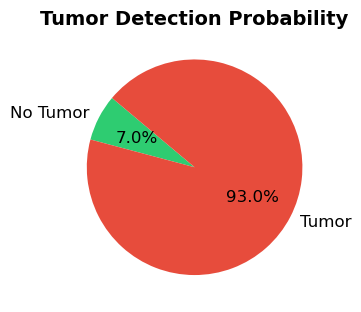

In [1]:
print("Starting the GUI application...")

import cv2
import numpy as np
import pickle
import shutil
from PIL import Image, ImageTk
import os
import tkinter as tk
from tkinter import ttk, filedialog, messagebox
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

MODEL_PATH = "C:\\machine learning\\BrainTumorDetection\\model\\svm_brain_tumor.pkl"
SCALER_PATH = "C:\\machine learning\\BrainTumorDetection\\model\\scaler.pkl"

with open(MODEL_PATH, 'rb') as model_file:
    model = pickle.load(model_file)

with open(SCALER_PATH, 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

class TumorDetectionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Brain Tumor Detection")
        self.root.geometry("1200x800")
        self.root.configure(bg="#1e272e")

        self.img_frame = tk.Frame(root, bg="#f9faf7")
        self.img_frame.place(x=20, y=20, width=300, height=250)

        self.img_label = tk.Label(self.img_frame, text="Upload MRI Scan", font=("Arial", 12), fg="white", bg="#485460")
        self.img_label.pack(expand=True, fill="both")

        self.case_frame = tk.Frame(root, bg="#e9ebdf")
        self.case_frame.place(x=850, y=20, width=300, height=250)

        self.case_labels = []
        for i in range(6):
            label = tk.Label(self.case_frame, text=f"Case {i+1}", font=("Arial", 10), fg="white", bg="#e9ebdf")
            label.grid(row=i//3, column=i%3, padx=5, pady=5)
            self.case_labels.append(label)

        self.info_frame = tk.LabelFrame(root, text="Patient Information", font=("Arial", 14, "bold"), fg="white", bg="#e9ebdf")
        self.info_frame.place(x=350, y=20, width=450, height=250)

        labels = ["Name", "Age", "City", "Contact", "Treatment By"]
        self.patient_entries = {}
        for i, label in enumerate(labels):
            tk.Label(self.info_frame, text=f"{label}:", font=("Arial", 12), fg="white", bg="#485460").grid(row=i, column=0, sticky="w", pady=5, padx=10)
            entry = ttk.Entry(self.info_frame, width=25)
            entry.grid(row=i, column=1, pady=5, padx=10)
            self.patient_entries[label] = entry

        self.table_frame = tk.Frame(root, bg="#e9ebdf")
        self.table_frame.place(x=20, y=300, width=750, height=350)

        self.table = ttk.Treeview(self.table_frame, columns=("Attribute", "Value"), show="headings", height=12)
        self.table.heading("Attribute", text="Attribute")
        self.table.heading("Value", text="Value")
        self.table.column("Attribute", width=120)
        self.table.column("Value", width=500)
        self.table.pack(fill="both", expand=True)

        self.graph_frame = tk.Frame(root, bg="#f3f5e9")
        self.graph_frame.place(x=800, y=300, width=350, height=350)

        self.button_frame = tk.Frame(root, bg="#eff5d3")
        self.button_frame.place(x=20, y=580, width=1140, height=50)

        buttons = [
            ("Upload MRI", self.upload_image),
            ("Generate Report", self.generate_graph_and_report),
            ("Clear", self.clear_form),
            ("Delete", self.delete_entry),
            ("Save Report", self.save_report),
            ("Update", self.update_entry)
        ]

        for i, (text, command) in enumerate(buttons):
            btn = ttk.Button(self.button_frame, text=text, command=command, style="TButton")
            btn.grid(row=0, column=i, padx=10, pady=10)

    def upload_image(self):
        file_path = filedialog.askopenfilename(filetypes=[("Image Files", "*.jpg *.png *.jpeg")])
        if not file_path:
            return
        img = Image.open(file_path).resize((250, 250))
        img = ImageTk.PhotoImage(img)
        self.img_label.config(image=img)
        self.img_label.image = img
        self.image_path = file_path

        for label in self.case_labels:
            case_img = Image.open(file_path).resize((90, 90))
            case_img = ImageTk.PhotoImage(case_img)
            label.config(image=case_img)
            label.image = case_img

    def generate_graph_and_report(self):
        if not hasattr(self, 'image_path'):
            messagebox.showerror("Error", "Please upload an image first.")
            return

        patient_name = self.patient_entries["Name"].get().strip()
        if not patient_name:
            messagebox.showerror("Error", "Please enter patient details.")
            return

        prediction = np.random.choice(["Yes", "No"], p=[0.6, 0.4])
        accuracy = np.random.uniform(80, 98)
        match_percent = np.random.randint(50, 95)

        treatment_suggestion = (
            "Advanced treatment with radiotherapy and targeted therapy is advised. Regular MRI follow-ups are necessary to monitor progress and avoid complications."
        ) if prediction == "Yes" else (
            "No immediate treatment required. Maintain a healthy lifestyle, ensure regular screenings, and follow medical guidance."
        )

        report_summary = (
            f"The analysis shows a {accuracy:.2f}% accuracy in detecting the tumor. The data match level is {match_percent}%, indicating a {prediction.lower()} detection case. Follow the recommended treatment for better recovery."
        )

        self.table.delete(*self.table.get_children())
        patient_data = [
            ("Name", patient_name),
            ("Age", self.patient_entries["Age"].get()),
            ("City", self.patient_entries["City"].get()),
            ("Contact", self.patient_entries["Contact"].get()),
            ("Treatment By", self.patient_entries["Treatment By"].get()),
            ("Disease", "Brain Tumor" if prediction == "Yes" else "No Tumor"),
            ("Result", prediction),
            ("Accuracy", f"{accuracy:.2f}%"),
            ("Data Match", f"{match_percent}%"),
            ("Treatment Suggestion", treatment_suggestion),
            ("Report Summary", report_summary)
        ]

        for attr, value in patient_data:
            self.table.insert("", "end", values=(attr, value))

        self.show_graph(prediction, accuracy)
    
    def clear_form(self):
        for entry in self.patient_entries.values():
            entry.delete(0, tk.END)
        self.table.delete(*self.table.get_children())
        self.img_label.config(image="", text="Upload MRI Scan")
        for label in self.case_labels:
            label.config(image="", text=f"Case")
        for widget in self.graph_frame.winfo_children():
            widget.destroy()

    def show_graph(self, prediction, accuracy):
        fig, ax = plt.subplots(figsize=(5, 4))
        labels = ["No Tumor", "Tumor"]
        sizes = [100 - accuracy, accuracy] if prediction == "Yes" else [accuracy, 100 - accuracy]
        colors = ['#2ecc71', '#e74c3c'] if prediction == "Yes" else ['#3498db', '#95a5a6']
        ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, textprops={'fontsize': 12})
        ax.set_title("Tumor Detection Probability", fontsize=14, fontweight="bold")
        for widget in self.graph_frame.winfo_children():
            widget.destroy()
        canvas = FigureCanvasTkAgg(fig, master=self.graph_frame)
        canvas.draw()
        canvas.get_tk_widget().pack()

    def delete_entry(self):
        self.table.delete(*self.table.get_children())

    def save_report(self):
        if not hasattr(self, 'image_path'):
            messagebox.showerror("Error", "Please upload an image first.")
            return
        patient_name = self.patient_entries["Name"].get().strip()
        if not patient_name:
            messagebox.showerror("Error", "Please enter the patient's name.")
            return
        report_dir = os.path.join(os.getcwd(), "reports")
        os.makedirs(report_dir, exist_ok=True)
        image_filename = f"{patient_name}_scan.jpg"
        image_path = os.path.join(report_dir, image_filename)
        shutil.copy(self.image_path, image_path)
        report_filename = f"{patient_name}_Tumor_Report.txt"
        report_path = os.path.join(report_dir, report_filename)
        with open(report_path, "w") as report_file:
            report_file.write("====================================\n")
            report_file.write("         Brain Tumor Report         \n")
            report_file.write("====================================\n\n")
            report_file.write(f"Patient Name     : {patient_name}\n")
            report_file.write(f"Age              : {self.patient_entries['Age'].get()}\n")
            report_file.write(f"City             : {self.patient_entries['City'].get()}\n")
            report_file.write(f"Contact          : {self.patient_entries['Contact'].get()}\n")
            report_file.write(f"Treatment By     : {self.patient_entries['Treatment By'].get()}\n")
            report_file.write("------------------------------------\n")
            for item in self.table.get_children():
                attribute, value = self.table.item(item, 'values')
                report_file.write(f"{attribute:<20}: {value}\n")
            report_file.write("------------------------------------\n")
        messagebox.showinfo("Report Saved", f"TXT report saved: {report_path}\nImage stored: {image_path}")

    def update_entry(self):
        messagebox.showinfo("Update", "Patient record updated successfully.")

print("All modules loaded successfully.")

root = tk.Tk()
root.resizable(False, False)
app = TumorDetectionApp(root)
root.mainloop()